In [1]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df = pd.read_csv("combined_eeg_data.csv")
df.head()

,channel0,channel1,channel2,channel3,channel4,channel5,channel6,channel7,channel8,channel9,channel10,channel11,channel12,channel13,channel14,channel15,label,file_name
0,-30.06,259.96,39.79,-210.44,79.58,9.73,-90.19,-150.32,-150.32,99.92,-110.53,59.24,-10.61,9.73,379.33,0.00,0,s12w1.eea.csv
1,-70.74,259.96,39.79,-250.23,99.92,-20.34,-10.61,-150.32,-210.44,179.50,-30.06,149.43,9.73,-70.74,439.46,9.73,0,s12w1.eea.csv
2,-90.19,219.29,79.58,-110.53,39.79,59.24,119.37,-70.74,-90.19,199.83,119.37,159.16,39.79,-10.61,439.46,-20.34,0,s12w1.eea.csv
3,29.18,269.69,129.98,-20.34,39.79,99.92,179.50,-10.61,0.00,179.50,209.56,109.64,89.31,19.45,359.88,19.45,0,s12w1.eea.csv
4,229.90,419.12,159.16,119.37,59.24,219.29,219.29,39.79,199.83,79.58,239.62,-70.74,79.58,79.58,59.24,-50.40,0,s12w1.eea.csv


In [3]:
from sklearn.model_selection import train_test_split

In [4]:
X = df.drop(['label', 'file_name'], axis=1)  # EEG channels are the features
y = df['label']  # Target labels (0 for healthy, 1 for schizophrenic)

In [5]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [6]:
print("Training set shape:", X_train.shape)
print("Test set shape:", X_test.shape)

Training set shape: (503808, 16)
Test set shape: (125952, 16)


In [7]:
from sklearn.linear_model import LogisticRegression

In [8]:
model = LogisticRegression()

In [9]:
model.fit(X_train,y_train)

LogisticRegression()

In [10]:
model.score(X_test,y_test)

0.5363551194105691

In [11]:
y_pred_logreg = model.predict(X_test)

In [12]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import matplotlib.pyplot as plt
import seaborn as sns

In [13]:
accuracy_logreg = accuracy_score(y_test, y_pred_logreg)
conf_matrix_logreg = confusion_matrix(y_test, y_pred_logreg)
class_report_logreg = classification_report(y_test, y_pred_logreg)

In [14]:
print(f"Accuracy: {accuracy_logreg}")
print("Classification Report:")
print(class_report_logreg)

Accuracy: 0.5363551194105691
Classification Report:
              precision    recall  f1-score   support

           0       0.07      0.00      0.00     58273
           1       0.54      1.00      0.70     67679

    accuracy                           0.54    125952
   macro avg       0.30      0.50      0.35    125952
weighted avg       0.32      0.54      0.38    125952



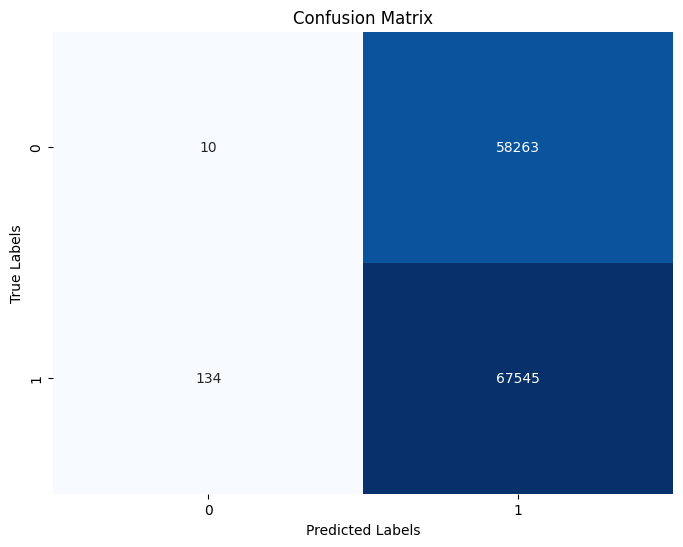

In [15]:
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_logreg, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('Confusion Matrix')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

In [16]:
import pickle
with open('LR_model.pkl', 'wb') as f:
    pickle.dump(model, f)